# PERMUTATION

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('/Users/vlad3d/MACHINE_LEARNING/KAGGLE_SKILS/ML_Explain/data/fifa/FIFA 2018 Statistics.csv')

In [14]:
y = (data['Man of the Match'] == 'Yes')
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state = 1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)


In [15]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(my_model, random_state=1).fit(val_X,val_y)
#eli5.show_weights(perm, feature_names = val_X.columns.tolist())

# PARTIAL PLOTS

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
tree_model = DecisionTreeClassifier(random_state=0, 
                                    max_depth=5, min_samples_split = 5).fit(train_X, train_y)
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

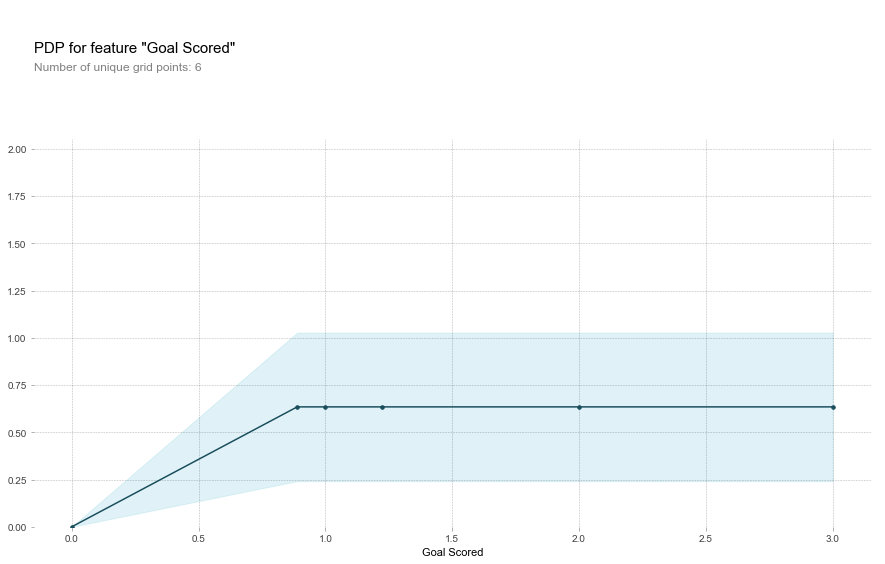

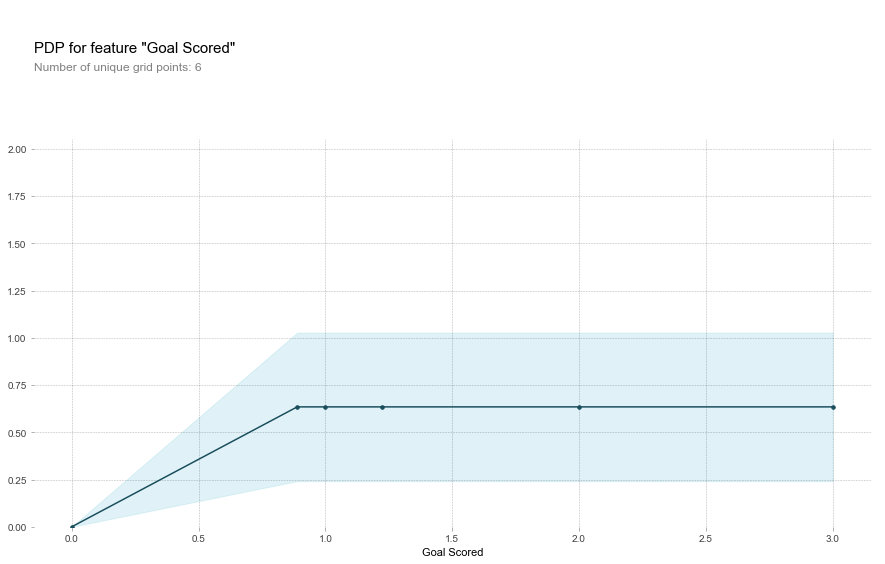

In [24]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
pdp_goals = pdp.pdp_isolate(model = tree_model, dataset=val_X,
                            model_features=feature_names, feature = 'Goal Scored')
pdp.pdp_plot(pdp_goals, 'Goal Scored')
plt.show()

In [25]:
feature_to_plot = 'Distance Covered (Kms)'
pdp_dist = pdp.pdp_isolate(model=tree_model,
                           dataset=val_X, model_features=feature_names, feature=feature_to_plot)

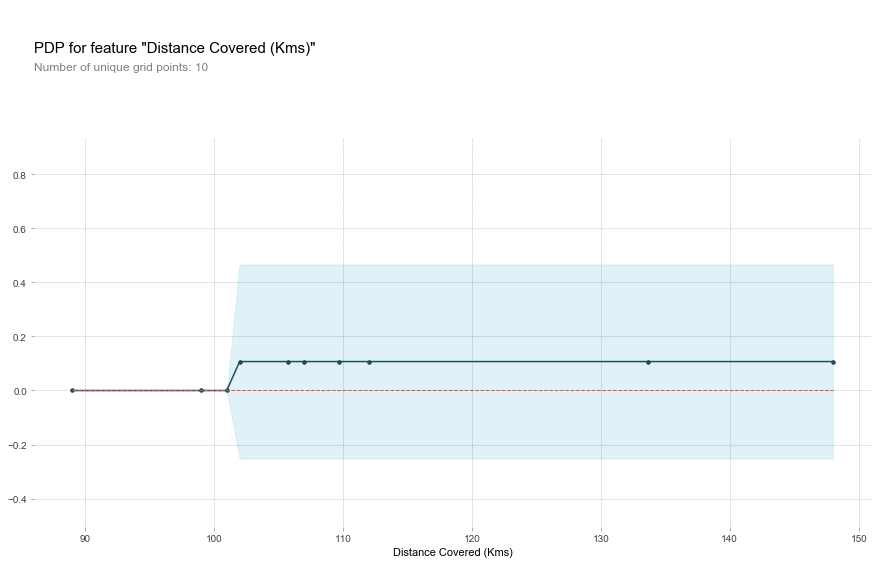

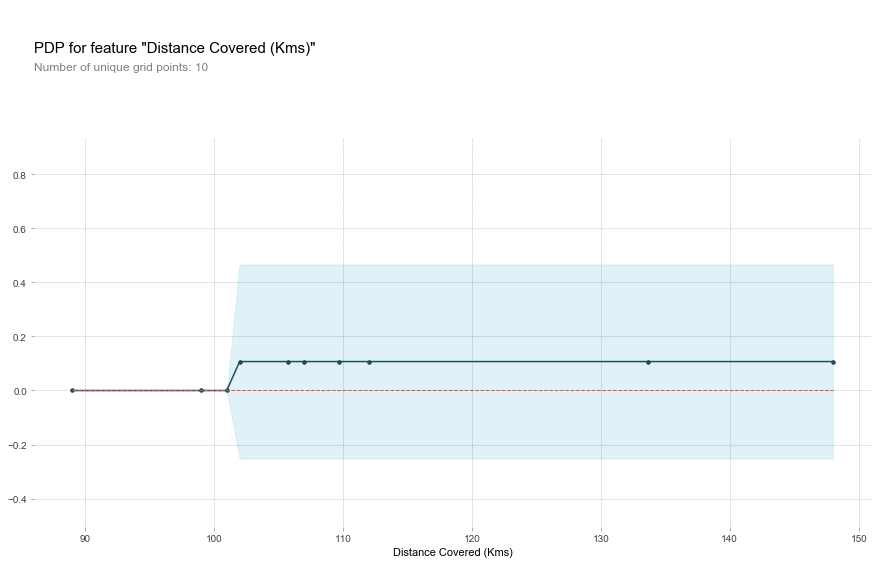

In [27]:
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

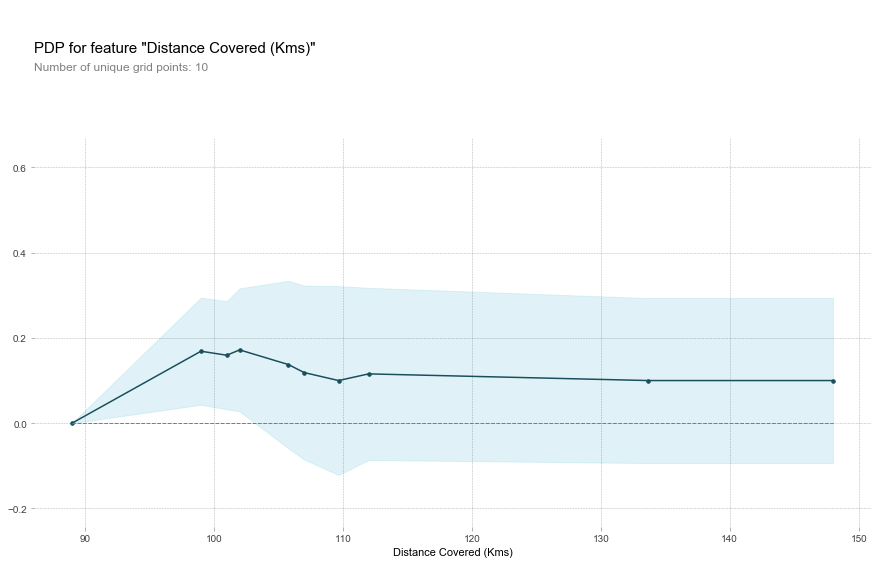

In [29]:
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
pdp_dist = pdp.pdp_isolate(model=rf_model, 
                           dataset=val_X, model_features=feature_names, feature=feature_to_plot)
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

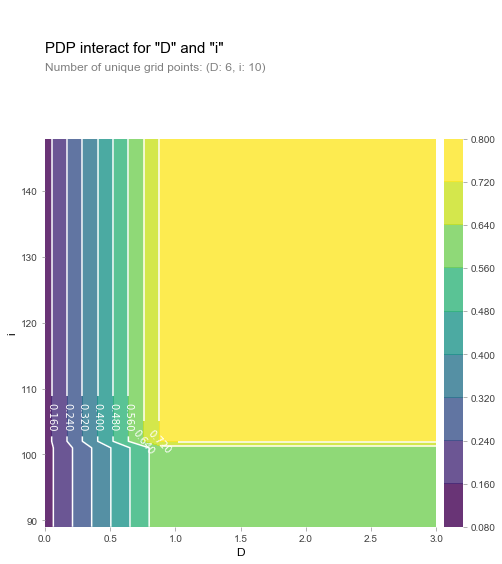

In [30]:
features_to_plot = ['Goal Scored', 'Distance Covered (Kms)']
inter1 = pdp.pdp_interact(model=tree_model, dataset=val_X, model_features=feature_names,
                         features = features_to_plot)
pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names= feature_to_plot, plot_type='contour')
plt.show()

# SHAP

In [32]:
row_to_show = 5
data_for_predictions = val_X.iloc[row_to_show]
data_for_prediction_array = data_for_predictions.values.reshape(1,-1)
my_model.predict_proba(data_for_prediction_array)

array([[0.3, 0.7]])

In [35]:
import shap
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(data_for_predictions)

In [36]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_predictions)

In [38]:
k_explainer = shap.KernelExplainer(my_model.predict_proba, train_X)
k_shap_values = k_explainer.shap_values(data_for_predictions)
shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], data_for_predictions)

# ADVANCED SHAP

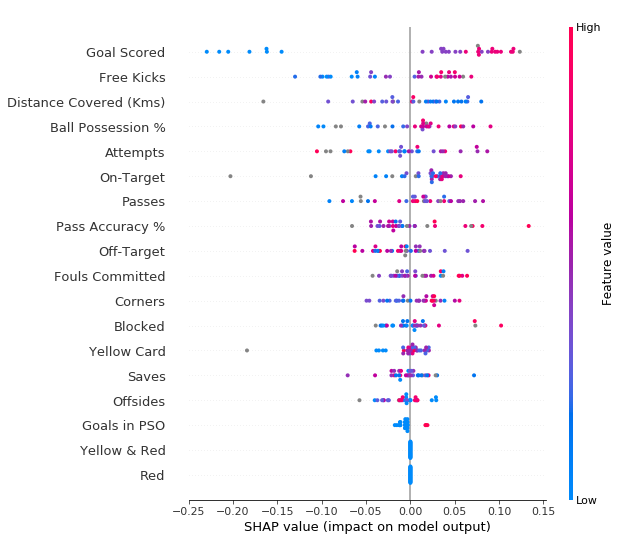

In [39]:
shap_values = explainer.shap_values(val_X)
shap.summary_plot(shap_values[1], val_X)


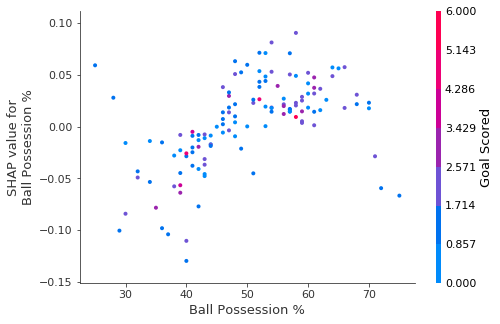

In [42]:
explainer1 = shap.TreeExplainer(my_model)
shap_values1 = explainer.shap_values(X)
shap.dependence_plot('Ball Possession %', shap_values1[1],X, interaction_index="Goal Scored")